# Online Retail

## 一. <a href='#資料介紹'>資料介紹</a>

1. 來源
2. 資料介紹
3. 欄位


## 二. <a href='#呈現'>呈現</a>
1. <a href='#1.-Load-Libraries'>Load Libraries</a>
2. <a href='#2.-Load-Data'>Load Data</a>
3. <a href='#3.-Data-Preprocessing'>Data Preprocessing</a>    
    1. Drop Duplicates
    2. Missing Value
    3. Outlier
    4. Date Split Year / Month / Hour / Year_Month / Week
    5. Date Before 2011-12-01
    6. Drop Quantity > quantile(.999)
    7. Drop Irrelevant Items
    
      
4. <a href='#4.-Analyze-Data'>Analyze Data</a>
    1. 客戶購買的商品數
    2. 以月份區分，比較總額和數量
    3. 星期
    4. 小時
    5. 總額前十名的商品以及數量前十名的商品
    6. 個別商品比較
        - Jumbo Bag Red Retrospot
        - White Hanging Heart T-Light Holder 
        - Pack Of 72 Retrospot Cake Cases
        
        
5. <a href='#5.-Apriori-Algorithm'>Apriori Algorithm</a>
    1. Definition
        1. Support (支持度) : 意思是某特定種類在所有種類的比重
        2. Confidence (信賴度) : 意思是某A種類中，含有某B種類的比重
        3. Lift (提升度) : 意思為某兩者關係的比值
    2. France
    3. Germany




---

## 資料介紹

### 1.來源
使用[UCI機器學習](https://archive.ics.uci.edu/ml/index.php)的[線上零售資料集](http://archive.ics.uci.edu/ml/datasets/Online+Retail)


### 2.資料介紹
- 資料包含了從 2010年12月1日 至 2011年12月9日 之間，在英國註冊的線上零售的所有交易數據。

- 因為 2011年12月 的資料不滿一個月，我會取 2010年12月1日 到 2011年11月30日 來分析

- 該公司主要銷售獨特的禮品，許多客戶都是批發商，客戶來自各個國家。

### 3.欄位

Shape：(541909, 8)


英文欄位|中文欄位|描述
:---:|:---:|:---
InvoiceNo|訂單編號|每筆交易分配唯一的6位整數，退貨訂單的代碼以字母'C'開頭。
StockCode|產品編號|每個不同的產品分配唯一的5位整數
Description|產品名稱|對每件產品的簡略描述。
Quantity|購買數量|每筆交易的每件產品的數量。
InvoiceDate|交易日期及時間|每筆交易發生的日期和時間。
UnitPrice|產品單價|單位產品價格。
CustomerID|客戶ID|每個客戶分配唯一的5位整數。
Country|客戶所在國家|每個客戶所在國家/地區的名稱。

<a href='#Online-Retail'>Back To Top</a>

---

## 呈現

## 1. Load Libraries

In [2]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

%matplotlib inline
pd.set_option('display.float_format',lambda x : '%.2f' % x)
pd.set_option('max_colwidth',100)
sns.set()

<a href='#Online-Retail'>Back To Top</a>

---

## 2. Load Data

In [3]:
dataset = pd.read_csv("../input/Online_Retail.csv")

### 資料筆數：(541909, 8)

In [4]:
dataset.shape

(541909, 8)

In [5]:
dataset.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010/12/1 8:26,2.55,17850.00,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010/12/1 8:26,3.39,17850.00,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010/12/1 8:26,2.75,17850.00,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010/12/1 8:26,3.39,17850.00,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010/12/1 8:26,3.39,17850.00,United Kingdom


In [6]:
dataset.Country.unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

#### 從下面這個圖可以看得出來Description的欄位有少數的缺失值，CustomerID有很多的缺失值

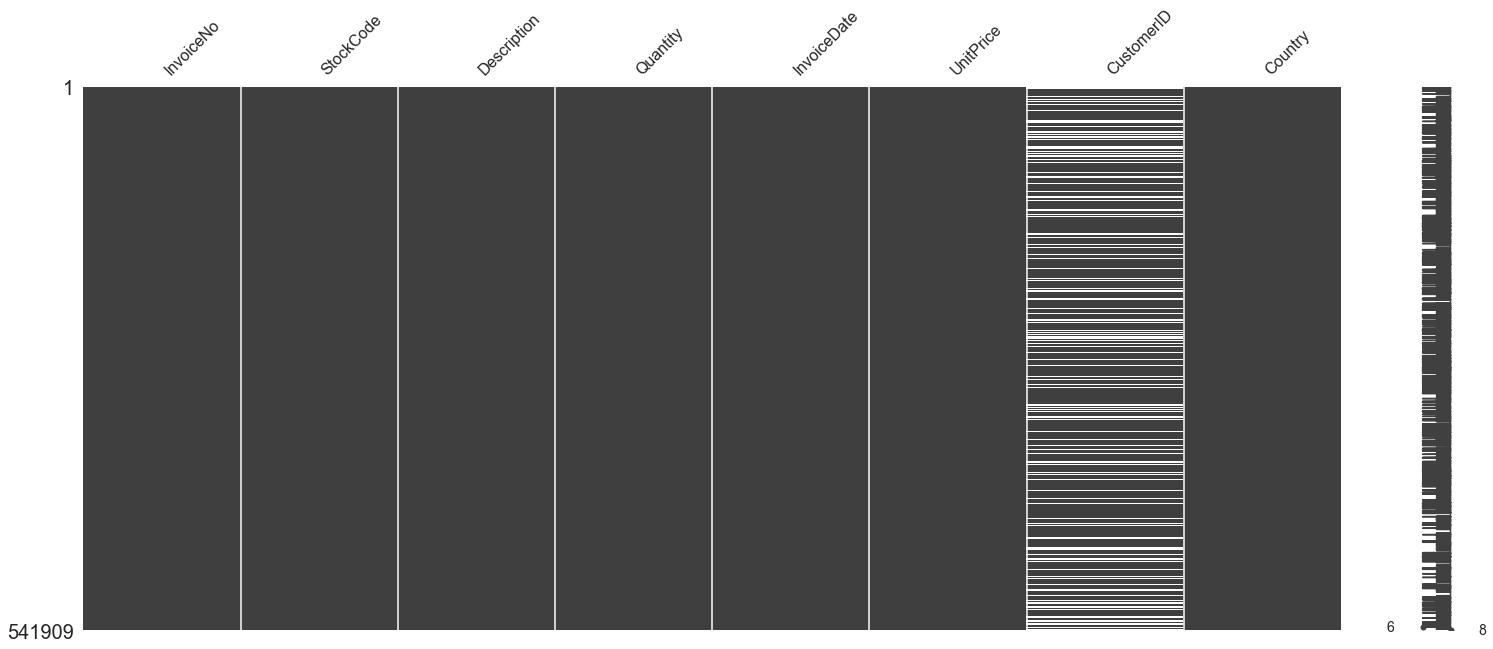

In [7]:
msno.matrix(dataset)

<a href='#Online-Retail'>Back To Top</a>

---

## 3. Data Preprocessing
1. Drop Duplicates
2. Missing Value
3. Outlier
4. Date Split Year / Month / Hour / Year_Month / Week
5. Date Before 2011-12-01
6. Drop Quantity > quantile(.999)
7. Drop Irrelevant Items


方法|刪除多少筆資料|剩多少筆資料
:---:|:---:|:---:
Drop Duplicates|5,268|536,641
Missing Value|135,037|401,604
Outlier(Quantity + UnitPrice)|8,912|392,692
Drop Date After 2011-11-30|17,026|375,666
Drop Quantity > quantile(.999)|368|375,298
Drop Irrelevant Items|1,477|373,821

### 3.1 Drop Duplicates
#### 把完全重複的資料刪除

In [8]:
dataset = dataset.drop_duplicates(subset=['InvoiceNo','StockCode','Description','Quantity','InvoiceDate','UnitPrice','CustomerID','Country'])
duplicates_length = 541909-dataset.shape[0]
print('Drop Duplicates : ', duplicates_length)
print('Dataset Now : ', dataset.shape[0])

Drop Duplicates :  5268
Dataset Now :  536641


---

### 3.2 Missing Value

#### 因為要研究用戶的消費行為以及產品的銷售情況，所以把用戶ID或者產品名稱缺失的數據刪除。
這邊選擇直接刪掉不填補缺失值，因為用戶ID跟產品名稱沒辦法靠其他欄位來做填補

In [9]:
def na_check(df):
    missing_data = pd.DataFrame(dataset.isnull().sum(), columns=['missing'])
    missing_data = missing_data.sort_values(ascending=False, by=['missing'])
    missing_data = missing_data[missing_data['missing']>0]
    display(missing_data)
na_check(dataset)

,missing
CustomerID,135037
Description,1454


In [10]:
dataset = dataset.dropna(subset=['InvoiceNo','CustomerID'],how='any')
missing_length = 541909-duplicates_length-dataset.shape[0]
print('Drop Missing Value: ',missing_length)
print('Dataset Now : ', dataset.shape[0])

Drop Missing Value:  135037
Dataset Now :  401604


---

### 3.3 Outlier

#### Quantity, UnitPrice 有Outlier

1. 購買產品的數量最小值為 -8095
2. 單品單價為 0

```
產品數量及單價都不可能為0，將這兩個不符合實際情況的異常值刪除
刪掉異常值時，也順便處理掉InvoiceNo(訂單編號)開頭為C的退貨資料了 
數量<0就表示退貨 
```

In [11]:
dataset.describe()

,Quantity,UnitPrice,CustomerID
count,401604.00,401604.00,401604.00
mean,12.18,3.47,15281.16
std,250.28,69.76,1714.01
min,-80995.00,0.00,12346.00
25%,2.00,1.25,13939.00
50%,5.00,1.95,15145.00
75%,12.00,3.75,16784.00
max,80995.00,38970.00,18287.00


In [12]:
dataset[dataset['InvoiceNo'].str.contains('C')].describe()['Quantity']

count     8872.00
mean       -30.77
std       1172.25
min     -80995.00
25%         -6.00
50%         -2.00
75%         -1.00
max         -1.00
Name: Quantity, dtype: float64

In [13]:
Quantity_num = len(dataset[dataset['Quantity']<=0])
UnitPrice_num = len(dataset[dataset['UnitPrice']<=0])
dataset = dataset[dataset['Quantity']>0]
dataset = dataset[dataset['UnitPrice']>0]

print('Drop Quantity <0 : ', Quantity_num)
print('Drop UnitPrice <0 : ', UnitPrice_num)
print('Drop Quantity + UnitPrice：', Quantity_num+UnitPrice_num)
print('Dataset Now : ', dataset.shape[0])

Drop Quantity <0 :  8872
Drop UnitPrice <0 :  40
Drop Quantity + UnitPrice： 8912
Dataset Now :  392692


---

### 3.4 Date Split Year / Month / Hour / Year_Month / Week

#### 把Date這個變數，再細分出Year / Month / Hour / Year_Month / Week，以便後續資料視覺化

In [14]:
dataset['Year'] = dataset['InvoiceDate'].map(lambda x:x.split('/')[0])
dataset['Month'] = dataset['InvoiceDate'].map(lambda x:x.split('/')[1])
dataset['Hour'] = dataset['InvoiceDate'].map(lambda x:x.split(' ')[1].split(':')[0])
dataset['Year_Month'] = dataset['Year'] + '-' + dataset['Month'] 

In [15]:
dataset.loc[:,'InvoiceDate']=pd.to_datetime(dataset.loc[:,'InvoiceDate'],
                                                   format='%Y-%m-%d')

In [16]:
dataset['Week'] = dataset['InvoiceDate'].map(lambda x:x.weekday())+1

In [17]:
dataset.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,Hour,Year_Month,Week
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.00,France,2011,12,12,2011-12,5
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.00,France,2011,12,12,2011-12,5
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.00,France,2011,12,12,2011-12,5
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.00,France,2011,12,12,2011-12,5
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.00,France,2011,12,12,2011-12,5


---

### 3.5 Date Before 2011-12-01

- 資料包含了從 2010年12月1日 至 2011年12月9日 之間

- 因為 2011年12月 的資料不滿一個月，我會取 2010年12月1日 到 2011年11月30日 來分析

In [18]:
After_20111201_num = len(dataset[(dataset.loc[:,'Year']=='2011') & (dataset.loc[:,'Month']=='12')])
dataset = dataset[-((dataset.loc[:,'Year']=='2011') & (dataset.loc[:,'Month']=='12'))]

print('Data After 2011-12-01 : ', After_20111201_num)
print('Dataset Now : ', dataset.shape[0])

Data After 2011-12-01 :  17026
Dataset Now :  375666


---

### 3.6 Drop Quantity > quantile(.999)
#### 刪掉Outlier，只保留99.9%的資料

In [19]:
quantity_999 = dataset['Quantity'].quantile(.999)
quantity_999_num = dataset[dataset['Quantity']>quantity_999].shape[0]
dataset = dataset[dataset['Quantity']<=quantity_999]

print('Quantity > quantile(.999) : ', quantity_999_num)
print('Dataset Now : ', dataset.shape[0])

Quantity > quantile(.999) :  368
Dataset Now :  375298


---

### 3.7 Drop Irrelevant Items
StockCode|Items
:---:|:---:
BANK CHARGES|銀行收費
CARRIAGE|運輸費用
DOTCOM POSTAGE|郵費
PADS|緩衝墊
M|使用說明書
POST|郵費

In [20]:
Irrelevant = dataset['StockCode'].unique()
Irrelevant.sort()
Irrelevant[::-1][:8]

array(['POST', 'PADS', 'M', 'DOT', 'C2', 'BANK CHARGES', '90214Y',
       '90214V'], dtype=object)

In [21]:
dataset = dataset[dataset['StockCode']!='BANK CHARGES']
dataset = dataset[dataset['StockCode']!='C2']
dataset = dataset[dataset['StockCode']!='DOT']
dataset = dataset[dataset['StockCode']!='PADS']
dataset = dataset[dataset['StockCode']!='M']
dataset = dataset[dataset['StockCode']!='POST']

print('Dataset Now : ', dataset.shape[0])

Dataset Now :  373821


<a href='#Online-Retail'>Back To Top</a>

---

## 4. Analyze Data

1. 客戶購買的商品數
2. 以月份區分，比較總額和數量
3. 星期
4. 小時
5. 總額前十名的商品以及數量前十名的商品
6. 個別商品比較
    - Jumbo Bag Red Retrospot
    - White Hanging Heart T-Light Holder 
    - Pack Of 72 Retrospot Cake Cases

In [22]:
## 把全部大寫改成首字母大寫
dataset['Description'] = dataset['Description'].str.title()

### 4.1 客戶購買的商品數
大部分的客戶購買的商品數都小於25，所以主要客戶為個人，少部分為廠商

In [23]:
transaction_df = dataset.groupby(['InvoiceNo','CustomerID'],as_index=False)['InvoiceDate'].count()
transaction_df = transaction_df.rename(columns = {'InvoiceDate':'Number of products'})
transaction_df.head()

,InvoiceNo,CustomerID,Number of products
0,536365,17850.00,7
1,536366,17850.00,2
2,536367,13047.00,12
3,536368,13047.00,4
4,536369,13047.00,1


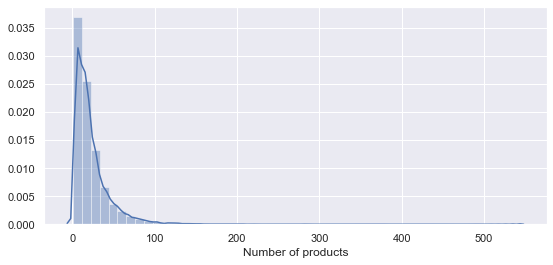

In [24]:
fig, ax = plt.subplots(figsize=(9,4))
sns.distplot(transaction_df['Number of products'],ax=ax)
plt.show()

### 4.2 以月份區分，比較總額和數量
可以看出9, 10月數量少，金額多

In [25]:
## Amount = Quantity * UnitPrice
dataset['Amount'] = dataset.Quantity * dataset.UnitPrice
monthly_sales = dataset.groupby(['Year_Month'])['Amount'].sum()
monthly_sales = pd.DataFrame({'Year_Month':monthly_sales.index, 'Monthly Sales':monthly_sales.values})
monthly_sales['index'] =  ['01', '02', '11', '12', '03', '04', '05', '06', '07', '08', '09', '10']
monthly_sales = monthly_sales.sort_values(by=['index']).drop(['index'], axis=1).reset_index(drop=True)

In [26]:
# InvoiceNo包含同一個人買的不同東西，所以要用unique InvoiceNo去計算
Unique_InvoiceNo = dataset.drop_duplicates(subset=['InvoiceNo'])
monthly_trans = Unique_InvoiceNo.groupby(['Year_Month'])['InvoiceNo'].count()
monthly_trans = pd.DataFrame({'Year_Month':monthly_trans.index, 'InvoiceNo':monthly_trans.values})
monthly_trans['index'] =  ['01', '02', '11', '12', '03', '04', '05', '06', '07', '08', '09', '10']
monthly_trans = monthly_trans.sort_values(by=['index']).drop(['index'], axis=1).reset_index(drop=True)

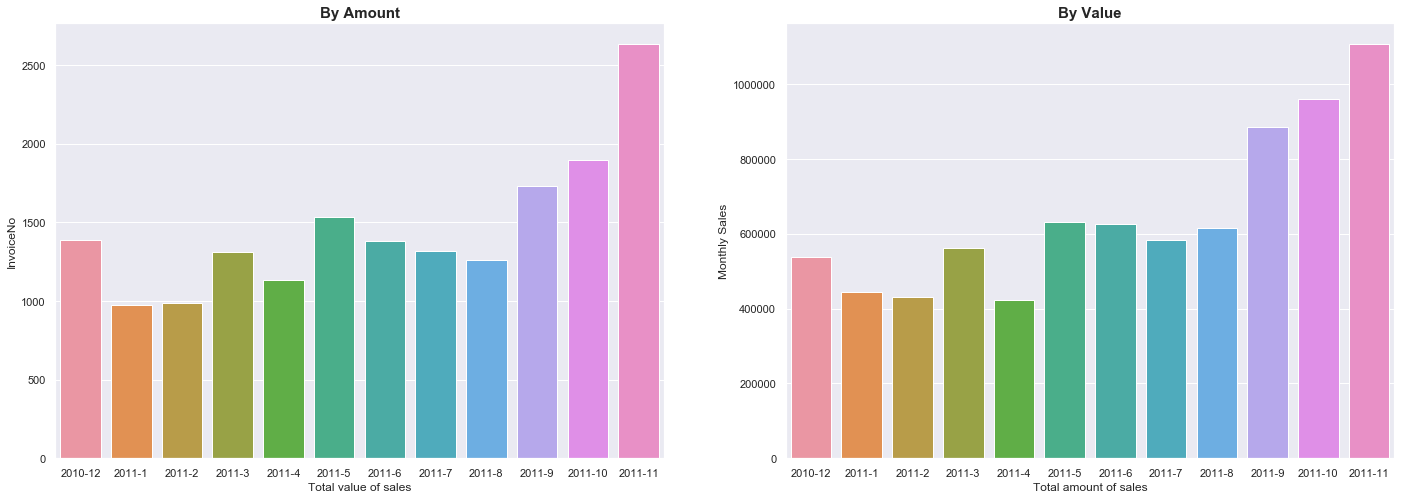

In [27]:
fig,axs = plt.subplots(nrows=1, ncols=2, figsize = (24,8))
sns.barplot(x = monthly_trans['Year_Month'], y = monthly_trans['InvoiceNo'], ax= axs[0]).set(xlabel='Total value of sales')
axs[0].set_title('By Amount', size=12, fontweight = 'bold', fontsize=15)
sns.barplot(x = monthly_sales['Year_Month'], y = monthly_sales['Monthly Sales'], ax= axs[1]).set(xlabel='Total amount of sales')
axs[1].set_title('By Value', size=12, fontweight = 'bold', fontsize=15)
plt.show()

### 4.3 星期
從這張圖可以看出沒有這份資料沒有星期六的交易資料，且在星期四的購買的人較多

In [28]:
Unique_InvoiceNo=dataset.drop_duplicates(subset=['InvoiceNo'])
weekly_trans=Unique_InvoiceNo.groupby(['Week'])['InvoiceNo'].count()
weekly_trans

Week
1    2708
2    3029
3    3313
4    3754
5    2641
7    2104
Name: InvoiceNo, dtype: int64

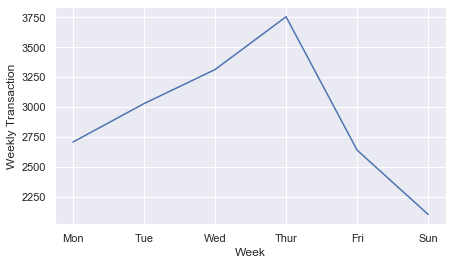

In [29]:
fig,ax = plt.subplots(figsize=(7,4))
x = ['Mon', 'Tue','Wed','Thur','Fri','Sun']
y = weekly_trans
plt.plot(x,y)
plt.xlabel('Week')
plt.ylabel('Weekly Transaction')
plt.show()

### 4.4 小時
從這張圖可以看出，顧客購買集中於早上10點到下午3點。

In [30]:
Unique_InvoiceNo=dataset.drop_duplicates(subset=['InvoiceNo'])
hourly_trans=Unique_InvoiceNo.groupby(['Hour'])['InvoiceNo'].count()
hourly_trans.to_frame().to_csv('hourly_trans.csv')
hourly_trans = pd.read_csv('hourly_trans.csv')
hourly_trans = hourly_trans.sort_values(by=['Hour'])

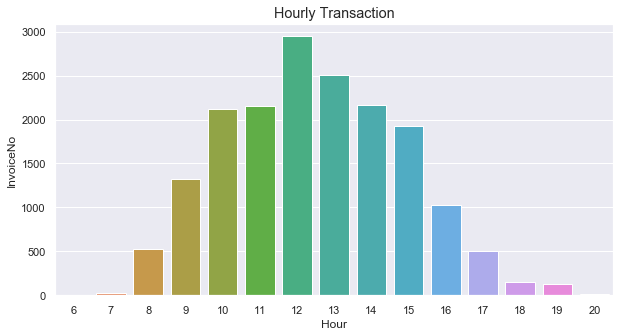

In [31]:
fig, ax = plt.subplots(figsize=(10,5))
sns.set(font_scale =1.2)

sns.barplot(x="Hour", y="InvoiceNo", data=hourly_trans) 
ax.set_title('Hourly Transaction')
ax.set_xticklabels(ax.get_xticklabels())
plt.show()

### 4.5 總額前十名的商品以及數量前十名的商品 比較
可以看出總額的前十名跟數量的前十名，有幾個重複，但大致上有些不同

In [32]:
Top10Quan = dataset.groupby(['Description'])['Quantity'].agg('sum').sort_values(ascending=False)[0:10]
Top10Price = dataset.groupby('Description')['Amount'].agg('sum').sort_values(ascending=False)[0:10]

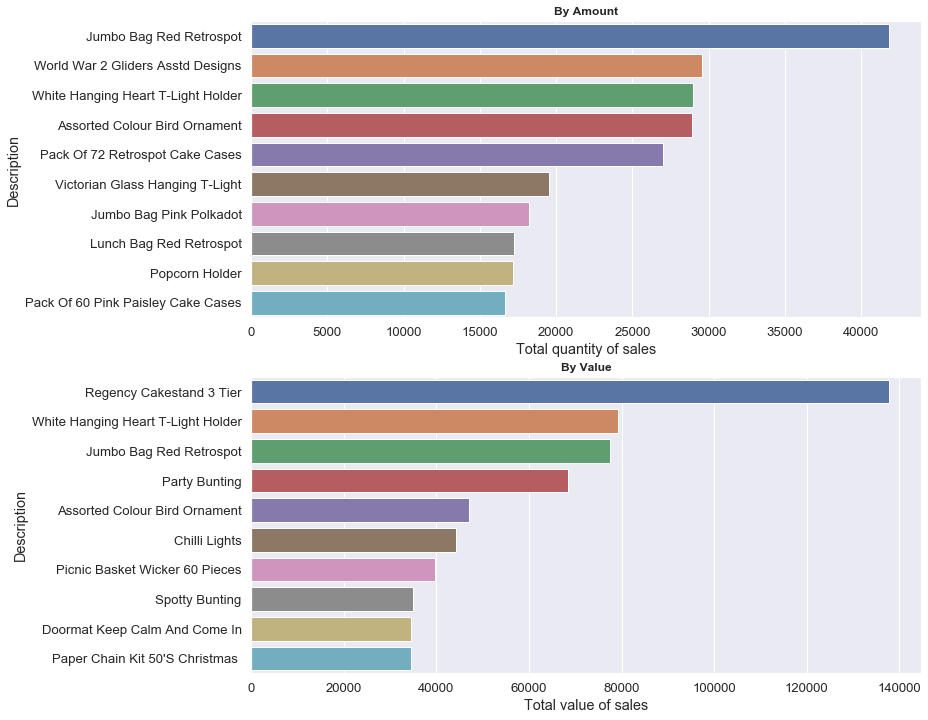

In [33]:
#creating the subplot
fig,axs = plt.subplots(nrows=2, ncols=1, figsize = (12,12))
sns.barplot(x=Top10Quan.values, y=Top10Quan.index, ax = axs[0]).set(xlabel='Total quantity of sales')
axs[0].set_title('By Amount', size=12, fontweight = 'bold')
sns.barplot(x = Top10Price.values, y = Top10Price.index, ax = axs[1]).set(xlabel='Total value of sales')
axs[1].set_title('By Value', size=12, fontweight = 'bold') 
plt.show()

In [34]:
Quantity_list = ['紅色紙袋', '滑翔機', '心型白色燈飾', '裝飾鳥', '72個杯子蛋糕盒',
                 '手提燈', '粉紅色紙袋', '紅色保冷袋', '爆米花袋', '60個杯子蛋糕盒']
Values_list = ['三層蛋糕盤', '心型白色燈飾', '紅色紙袋', '派對裝飾旗子', '裝飾鳥', 
               '辣椒造型燈泡', '60個杯子蛋糕盒', '圓錐形派對裝飾', '門口地毯', '聖誕裝飾']
df = pd.DataFrame({'Top 10 Quantity':Top10Quan.index, 'Top 10 Quantity_中文':Quantity_list, 'Rank':list(range(1,11)), 'Top 10 Values':Top10Price.index, 'Top 10 Values_中文':Values_list}, index=None)
df

,Top 10 Quantity,Top 10 Quantity_中文,Rank,Top 10 Values,Top 10 Values_中文
0,Jumbo Bag Red Retrospot,紅色紙袋,1,Regency Cakestand 3 Tier,三層蛋糕盤
1,World War 2 Gliders Asstd Designs,滑翔機,2,White Hanging Heart T-Light Holder,心型白色燈飾
2,White Hanging Heart T-Light Holder,心型白色燈飾,3,Jumbo Bag Red Retrospot,紅色紙袋
3,Assorted Colour Bird Ornament,裝飾鳥,4,Party Bunting,派對裝飾旗子
4,Pack Of 72 Retrospot Cake Cases,72個杯子蛋糕盒,5,Assorted Colour Bird Ornament,裝飾鳥
5,Victorian Glass Hanging T-Light,手提燈,6,Chilli Lights,辣椒造型燈泡
6,Jumbo Bag Pink Polkadot,粉紅色紙袋,7,Picnic Basket Wicker 60 Pieces,60個杯子蛋糕盒
7,Lunch Bag Red Retrospot,紅色保冷袋,8,Spotty Bunting,圓錐形派對裝飾
8,Popcorn Holder,爆米花袋,9,Doormat Keep Calm And Come In,門口地毯
9,Pack Of 60 Pink Paisley Cake Cases,60個杯子蛋糕盒,10,Paper Chain Kit 50'S Christmas,聖誕裝飾


<img src='../img/Amount.png' style='zoom:30%'>

----------------------------------------------------

<img src='../img/Value.png' style='zoom:30%'>

### 4.6 個別商品比較

#### Jumbo Bag Red Retrospot : 紅色紙袋
- 銷售量在八月達到高峰，且持續維持
- 可能是九月之後國外節慶較多，像是十月的萬聖節、十一月的感恩節、十二月的聖誕節
- 都需要有送禮的需求，因此紙袋銷量增加很多

[Text(0.5, 0, 'Total value of sales')]

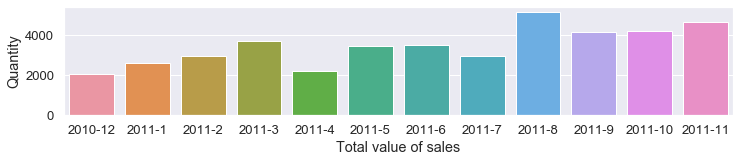

In [35]:
fig,axs = plt.subplots(figsize = (12,2))
abc = dataset[dataset['Description']=='Jumbo Bag Red Retrospot'].groupby(['Year_Month']).agg(sum)['Quantity']
abc = pd.DataFrame({'Year_Month':abc.index, 'Quantity':abc.values})
abc['index'] =  ['01', '02', '11', '12', '03', '04', '05', '06', '07', '08', '09', '10']
abc = abc.sort_values(by=['index']).drop(['index'], axis=1).reset_index(drop=True)
sns.barplot(x = abc['Year_Month'], y = abc['Quantity']).set(xlabel='Total value of sales')

#### White Hanging Heart T-Light Holder : 心型白色燈飾
- 可以明顯看出這個心形狀燈飾跟紙袋的圖就有不太一樣
- 在11, 12月的購買數量就特別多
- 推測可能是送給太太或女朋友的聖誕禮物

[Text(0.5, 0, 'Total value of sales')]

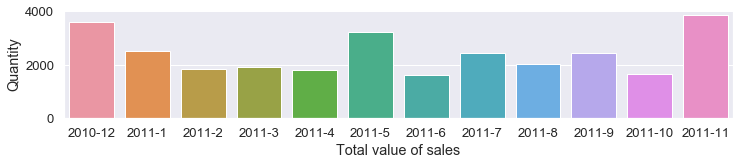

In [36]:
fig,axs = plt.subplots(figsize = (12,2))
abc = dataset[dataset['Description']=='White Hanging Heart T-Light Holder'].groupby(['Year_Month']).agg(sum)['Quantity']
abc = pd.DataFrame({'Year_Month':abc.index, 'Quantity':abc.values})
abc['index'] =  ['01', '02', '11', '12', '03', '04', '05', '06', '07', '08', '09', '10']
abc = abc.sort_values(by=['index']).drop(['index'], axis=1).reset_index(drop=True)
sns.barplot(x = abc['Year_Month'], y = abc['Quantity']).set(xlabel='Total value of sales')

#### Pack Of 72 Retrospot Cake Cases : 72個杯子蛋糕盒
- 可以看到這個商品在3,11,12月的數量都都明顯高於其他月份
- 每年的 3/17 是Saint Patrick's Day(聖派翠克節)，是英國人很重大的節日
- 12月的聖誕節也是很重大的節日
- 因為有重大的節日，就會舉辦派對，派對上都會有蛋糕，因此蛋糕盒的數量在3, 11, 12月會特別高

[Text(0.5, 0, 'Total value of sales')]

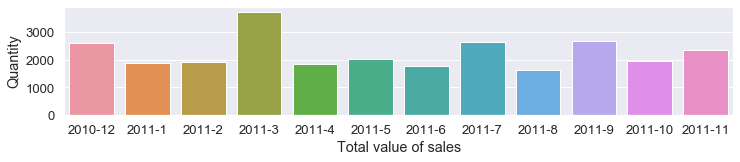

In [37]:
fig,axs = plt.subplots(figsize = (12,2))
abc = dataset[dataset['Description']=='Pack Of 72 Retrospot Cake Cases'].groupby(['Year_Month']).agg(sum)['Quantity']
abc = pd.DataFrame({'Year_Month':abc.index, 'Quantity':abc.values})
abc['index'] =  ['01', '02', '11', '12', '03', '04', '05', '06', '07', '08', '09', '10']
abc = abc.sort_values(by=['index']).drop(['index'], axis=1).reset_index(drop=True)
sns.barplot(x = abc['Year_Month'], y = abc['Quantity']).set(xlabel='Total value of sales')

<a href='#Online-Retail'>Back To Top</a>

## 5. Apriori Algorithm

### 5.1 Definition
#### A. Support (支持度) : 意思是某特定種類在所有種類的比重
```
例如 : 我有100名會員，其中有20名購買過雨具，則support(雨具) = 20% 。
```
#### B. Confidence (信賴度) : 意思是某A種類中，含有某B種類的比重
```
例如 :　我有100名會員，其中40人買過涼鞋，而這40買過涼鞋者當中，又另有10人買過雨具，
則confidence(涼鞋->雨具) = 10/40 = 25% 。
```
#### C. Lift (提升度) : 意思為某兩者關係的比值
```
如果小於1代表兩者是負相關，等於1表示兩者獨立，大於1表示兩者正相關，
公式為confidence(A->B) / support(B) 
帶入上述例子可表示成 lift(涼鞋->雨具) = Confidence/Support　=　25/20 = 1.25 
```

In [38]:
df = dataset.copy()
df['Description'] = df['Description'].str.strip()

### 其他國家購買
因為這個資料是英國線上零售的數據，所以這張圖是除了英國以外的國家的交易筆數

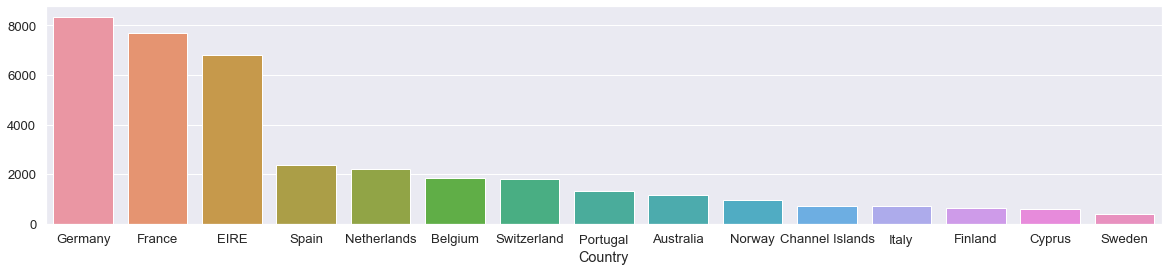

In [39]:
fig,axs = plt.subplots(figsize = (20,4))
other_country = df[df['Country']!='United Kingdom'].groupby(['Country'])['InvoiceNo'].count().sort_values(ascending=False)[0:15]
sns.barplot(x = other_country.index, y = other_country.values)

---

## 5.2 France

In [40]:
basket = (df[df['Country'] =="France"]
.pivot_table(index="InvoiceNo", columns="Description", values="Quantity", aggfunc="sum",fill_value=0))

In [41]:
basket.head()

Description,10 Colour Spaceboy Pen,12 Coloured Party Balloons,12 Egg House Painted Wood,12 Message Cards With Envelopes,12 Pencil Small Tube Woodland,12 Pencils Small Tube Red Retrospot,12 Pencils Small Tube Skull,12 Pencils Tall Tube Posy,12 Pencils Tall Tube Red Retrospot,12 Pencils Tall Tube Woodland,...,Wrap Suki And Friends,Wrap Vintage Petals Design,Yellow Coat Rack Paris Fashion,Yellow Giant Garden Thermometer,Zinc Star T-Light Holder,Zinc Folkart Sleigh Bells,Zinc Herb Garden Container,Zinc Metal Heart Decoration,Zinc T-Light Holder Star Large,Zinc T-Light Holder Stars Small
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536370,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536852,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536974,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
537065,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
537463,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [42]:
basket.sum().sort_values(ascending =False).head()

Description
Rabbit Night Light               2806
Mini Paint Set Vintage           2196
Set/6 Red Spotty Paper Cups      1260
Red Toadstool Led Night Light    1243
Assorted Colour Bird Ornament    1204
dtype: int64

In [43]:
# one hot encoding
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1
basket_sets = basket.applymap(encode_units)
basket_sets.sum().sort_values(ascending =False).head()

Description
Red Toadstool Led Night Light       67
Plasters In Tin Woodland Animals    66
Rabbit Night Light                  65
Plasters In Tin Circus Parade       62
Lunch Bag Red Retrospot             60
dtype: int64

In [44]:
frequent_itemsets = apriori(basket_sets, min_support=0.07, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
print(rules.shape[0])

34


In [45]:
rules_France = rules.copy()
rules_France.drop(['antecedent support', 'consequent support', 'leverage', 'conviction'], axis = 1, inplace=True)

## 說明
拿第一筆資料來看：{紅色紙巾+紅色紙杯} => {紅色紙盤} 來看
- Support：三者品項同時出現佔所有商品品項11%
- Confidence：有買 {紅色紙巾+紅色紙杯} 的人中，也會買 {紅色紙盤} 的人佔了97%
- Lift：買了 {紅色紙巾+紅色紙杯} 的人也會 {紅色紙盤} 的提升度 為7.18

（可以這樣理解提升度：將兩種物品捆綁銷售的結果，比分別銷售兩種物品的結果提升的倍數）

<img src='../img/France.png' style='zoom:30%'>

In [46]:
rules_France.sort_values(by=['confidence'],ascending=False).head(10)

,antecedents,consequents,support,confidence,lift
29,"(Set/6 Red Spotty Paper Cups, Set/20 Red Retrospot Paper Napkins)",(Set/6 Red Spotty Paper Plates),0.11,0.97,7.18
28,"(Set/6 Red Spotty Paper Plates, Set/20 Red Retrospot Paper Napkins)",(Set/6 Red Spotty Paper Cups),0.11,0.97,6.64
20,(Set/6 Red Spotty Paper Plates),(Set/6 Red Spotty Paper Cups),0.13,0.96,6.53
21,(Set/6 Red Spotty Paper Cups),(Set/6 Red Spotty Paper Plates),0.13,0.89,6.53
0,(Alarm Clock Bakelike Red),(Alarm Clock Bakelike Green),0.08,0.82,8.74
1,(Alarm Clock Bakelike Green),(Alarm Clock Bakelike Red),0.08,0.82,8.74
30,"(Set/6 Red Spotty Paper Plates, Set/6 Red Spotty Paper Cups)",(Set/20 Red Retrospot Paper Napkins),0.11,0.81,5.72
18,(Set/6 Red Spotty Paper Plates),(Set/20 Red Retrospot Paper Napkins),0.11,0.80,5.63
22,"(Plasters In Tin Spaceboy, Plasters In Tin Circus Parade)",(Plasters In Tin Woodland Animals),0.07,0.79,4.31
14,(Plasters In Tin Spaceboy),(Plasters In Tin Woodland Animals),0.11,0.78,4.29


In [47]:
rules_France[ (rules_France['lift'] >= 6) &
       (rules_France['confidence'] >= 0.8)]

,antecedents,consequents,support,confidence,lift
0,(Alarm Clock Bakelike Red),(Alarm Clock Bakelike Green),0.08,0.82,8.74
1,(Alarm Clock Bakelike Green),(Alarm Clock Bakelike Red),0.08,0.82,8.74
20,(Set/6 Red Spotty Paper Plates),(Set/6 Red Spotty Paper Cups),0.13,0.96,6.53
21,(Set/6 Red Spotty Paper Cups),(Set/6 Red Spotty Paper Plates),0.13,0.89,6.53
28,"(Set/6 Red Spotty Paper Plates, Set/20 Red Retrospot Paper Napkins)",(Set/6 Red Spotty Paper Cups),0.11,0.97,6.64
29,"(Set/6 Red Spotty Paper Cups, Set/20 Red Retrospot Paper Napkins)",(Set/6 Red Spotty Paper Plates),0.11,0.97,7.18


### Confidence前十名 
1. 紅色紙巾, 紅色紙杯, 紅色紙盤
2. 綠色鬧鐘, 紅色鬧鐘
3. 馬戲團OK繃, 太空人OK繃, 森林動物OK繃

---

## 5.3 Germany

In [51]:
basket2 = (df[df['Country'] =="Germany"]
.pivot_table(index="InvoiceNo", columns="Description", values="Quantity", aggfunc="sum",fill_value=0))

In [52]:
basket2.head()

Description,10 Colour Spaceboy Pen,12 Coloured Party Balloons,12 Ivory Rose Peg Place Settings,12 Message Cards With Envelopes,12 Pencil Small Tube Woodland,12 Pencils Small Tube Red Retrospot,12 Pencils Small Tube Skull,12 Pencils Tall Tube Posy,12 Pencils Tall Tube Red Retrospot,12 Pencils Tall Tube Skulls,...,Yuletide Images Gift Wrap Set,Zinc Heart T-Light Holder,Zinc Star T-Light Holder,Zinc Box Sign Home,Zinc Folkart Sleigh Bells,Zinc Heart Lattice T-Light Holder,Zinc Metal Heart Decoration,Zinc T-Light Holder Star Large,Zinc T-Light Holder Stars Small,Zinc Willie Winkie Candle Stick
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536527,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536840,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536861,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536967,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536983,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [53]:
basket2.sum().sort_values(ascending =False).head()

Description
Round Snack Boxes Set Of4 Woodland    1179
Woodland Charlotte Bag                1010
Pack Of 72 Retrospot Cake Cases        978
Pack Of 6 Birdy Gift Tags              924
Popart Wooden Pencils Asst             800
dtype: int64

In [54]:
basket2_sets = basket2.applymap(encode_units)
basket2_sets.sum().sort_values(ascending =False).head()

Description
Round Snack Boxes Set Of4 Woodland    107
Round Snack Boxes Set Of 4 Fruits      68
Regency Cakestand 3 Tier               61
Plasters In Tin Woodland Animals       59
Woodland Charlotte Bag                 57
dtype: int64

In [55]:
# one hot encoding
basket_sets2 = basket2.applymap(encode_units)
frequent_itemsets2 = apriori(basket_sets2, min_support=0.05, use_colnames=True)
rules2 = association_rules(frequent_itemsets2, metric="lift", min_threshold=1)
print(rules2.shape[0])

20


In [56]:
rules_Germany = rules2.copy()
rules_Germany.drop(['antecedent support', 'consequent support', 'leverage', 'conviction'], axis = 1, inplace=True)

## 說明
拿第一筆資料來看：{紅色手提肩包} => {森林動物手提肩包} 來看
- Support：兩者品項同時出現佔所有商品品項6%
- Confidence：有買 {紅色手提肩包} 的人中，也會買 {森林動物手提肩包} 的人佔了87%
- Lift：買了 {紅色手提肩包} 的人也會 {森林動物手提肩包} 的提升度 為6.51

（可以這樣理解提升度：將兩種物品捆綁銷售的結果，比分別銷售兩種物品的結果提升的倍數）

<img src='../img/Germany.png' style='zoom:30%'>

In [57]:
rules_Germany.sort_values(by=['confidence'],ascending=False).head(10)

,antecedents,consequents,support,confidence,lift
13,(Red Retrospot Charlotte Bag),(Woodland Charlotte Bag),0.06,0.87,6.51
15,(Round Snack Boxes Set Of 4 Fruits),(Round Snack Boxes Set Of4 Woodland),0.13,0.82,3.28
17,(Spaceboy Lunch Box),(Round Snack Boxes Set Of4 Woodland),0.07,0.69,2.74
2,(Plasters In Tin Circus Parade),(Plasters In Tin Woodland Animals),0.07,0.58,4.19
8,(Plasters In Tin Spaceboy),(Plasters In Tin Woodland Animals),0.06,0.57,4.15
11,(Plasters In Tin Woodland Animals),(Round Snack Boxes Set Of4 Woodland),0.08,0.54,2.16
14,(Round Snack Boxes Set Of4 Woodland),(Round Snack Boxes Set Of 4 Fruits),0.13,0.52,3.28
7,(Plasters In Tin Circus Parade),(Round Snack Boxes Set Of4 Woodland),0.06,0.50,1.99
3,(Plasters In Tin Woodland Animals),(Plasters In Tin Circus Parade),0.07,0.49,4.19
19,(Woodland Charlotte Bag),(Round Snack Boxes Set Of4 Woodland),0.07,0.49,1.96


In [58]:
rules_Germany[ (rules_Germany['lift'] >= 4) &
        (rules_Germany['confidence'] >= 0.5)]

,antecedents,consequents,support,confidence,lift
2,(Plasters In Tin Circus Parade),(Plasters In Tin Woodland Animals),0.07,0.58,4.19
8,(Plasters In Tin Spaceboy),(Plasters In Tin Woodland Animals),0.06,0.57,4.15
13,(Red Retrospot Charlotte Bag),(Woodland Charlotte Bag),0.06,0.87,6.51


### Confidence前十名 
1. 紅色手提肩包, 森林動物手提肩包
2. 水果造型點心盒, 森林動物造型點心盒, 太空人造型午餐盒
3. 馬戲團OK繃, 太空人OK繃, 森林動物OK繃

## 結論
1. 不同東西 但會一起使用到的
    - Ex：紅色紙巾, 紅色紙杯, 紅色紙盤
    
    
2. 相同東西不同樣式
    - Ex：馬戲團OK繃, 太空人OK繃, 森林動物OK繃

<a href='#Online-Retail'>Back To Top</a>